# CNN w/ Data Augmentation to fix overfitting

In [1]:
import os
import zipfile
import random
import shutil
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


# Extract and store the data

In [2]:
local_zip = 'C:/Users/Alexl/OneDrive/Documents/Work/Portfolio Projects/CNN with Data Augmentation - Kaggle Cats vs Dogs Dataset/cats-and-dogs.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('C:/Users/Alexl/OneDrive/Documents/Work/Portfolio Projects/CNN with Data Augmentation - Kaggle Cats vs Dogs Dataset')
zip_ref.close()

# Preprocess the data and create ImageDataGenerater objects

In [3]:
source_path = 'C:/Users/Alexl/OneDrive/Documents/Work/Portfolio Projects/CNN with Data Augmentation - Kaggle Cats vs Dogs Dataset/PetImages'
source_path_dogs = os.path.join(source_path, 'Dog')
source_path_cats = os.path.join(source_path, 'Cat')

# Deletes all non-image files (there are two .db files at the end of the datasets)
#!find /tmp/PetImages/ -type f ! -name "*.jpg" -exec rm {} +
spdt = os.path.join(source_path_dogs, os.listdir(source_path_dogs)[-1]) 
spct = os.path.join(source_path_cats, os.listdir(source_path_cats)[-1])
os.remove(spdt)
os.remove(spct)

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_dogs))} images of dogs.")
print(f"There are {len(os.listdir(source_path_cats))} images of cats.")

There are 12500 images of dogs.
There are 12500 images of cats.


In [4]:
# Define root directory
root_dir = 'C:/Users/Alexl/OneDrive/Documents/Work/Portfolio Projects/CNN with Data Augmentation - Kaggle Cats vs Dogs Dataset/cats-v-dogs'

# Empty directory to prevent FileExistsError if this function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):
  """
  Creates directories for the train and test sets
  
  Args:
    root_path (string) - the base directory path to create subdirectories from
  
  Returns:
    None
  """  
  #train_dir = os.makedirs(os.path.join(root_path, 'training'))
  cat_train_dir = os.makedirs(os.path.join(root_path, 'training/cats'))
  dog_train_dir = os.makedirs(os.path.join(root_path, 'training/dogs'))

  cat_val_dir = os.makedirs(os.path.join(root_path, 'validation/cats'))
  dog_val_dir = os.makedirs(os.path.join(root_path, 'validation/dogs'))
   
try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")


In [5]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets
  
  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training
    
  Returns:
    None
  """
  all_files = []
    
  for file_name in os.listdir(SOURCE_DIR):
    file_path = SOURCE_DIR + file_name

    if os.path.getsize(file_path):
      all_files.append(file_name)
    else:
      print('{} is zero length, so ignoring'.format(file_name))
    
  n_files = len(all_files)
  split_point = int(n_files * SPLIT_SIZE)
    
  shuffled = random.sample(all_files, n_files)
    
  train_set = shuffled[:split_point]
  test_set = shuffled[split_point:]
    
  for file_name in train_set:
    copyfile(SOURCE_DIR + file_name, TRAINING_DIR + file_name)
        
  for file_name in test_set:
    copyfile(SOURCE_DIR + file_name, VALIDATION_DIR + file_name)

In [6]:
# Define paths
CAT_SOURCE_DIR = source_path_cats + "/"
DOG_SOURCE_DIR = source_path_dogs + "/"

print(CAT_SOURCE_DIR)

TRAINING_DIR = "C:/Users/Alexl/OneDrive/Documents/Work/Portfolio Projects/CNN with Data Augmentation - Kaggle Cats vs Dogs Dataset/cats-v-dogs/training/"
VALIDATION_DIR = "C:/Users/Alexl/OneDrive/Documents/Work/Portfolio Projects/CNN with Data Augmentation - Kaggle Cats vs Dogs Dataset/cats-v-dogs/validation/"

print(TRAINING_DIR)

TRAINING_CATS_DIR = os.path.join(TRAINING_DIR, "cats/")
VALIDATION_CATS_DIR = os.path.join(VALIDATION_DIR, "cats/")

print(TRAINING_CATS_DIR)

TRAINING_DOGS_DIR = os.path.join(TRAINING_DIR, "dogs/")
VALIDATION_DOGS_DIR = os.path.join(VALIDATION_DIR, "dogs/")

print(TRAINING_DOGS_DIR)

# Define proportion of images used for training
split_size = .9

# NOTE: Messages about zero length images should be printed out
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, VALIDATION_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, VALIDATION_DOGS_DIR, split_size)

# Check that the number of images matches the expected output
# Your function should perform copies rather than moving images so original directories should contain unchanged images
print(f"\n\nOriginal cat's directory has {len(os.listdir(CAT_SOURCE_DIR))} images")
print(f"Original dog's directory has {len(os.listdir(DOG_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_CATS_DIR))} images of cats for training")
print(f"There are {len(os.listdir(TRAINING_DOGS_DIR))} images of dogs for training")
print(f"There are {len(os.listdir(VALIDATION_CATS_DIR))} images of cats for validation")
print(f"There are {len(os.listdir(VALIDATION_DOGS_DIR))} images of dogs for validation")

C:/Users/Alexl/OneDrive/Documents/Work/Portfolio Projects/CNN with Data Augmentation - Kaggle Cats vs Dogs Dataset/PetImages\Cat/
C:/Users/Alexl/OneDrive/Documents/Work/Portfolio Projects/CNN with Data Augmentation - Kaggle Cats vs Dogs Dataset/cats-v-dogs/training/
C:/Users/Alexl/OneDrive/Documents/Work/Portfolio Projects/CNN with Data Augmentation - Kaggle Cats vs Dogs Dataset/cats-v-dogs/training/cats/
C:/Users/Alexl/OneDrive/Documents/Work/Portfolio Projects/CNN with Data Augmentation - Kaggle Cats vs Dogs Dataset/cats-v-dogs/training/dogs/
666.jpg is zero length, so ignoring
11702.jpg is zero length, so ignoring


Original cat's directory has 12500 images
Original dog's directory has 12500 images

There are 11249 images of cats for training
There are 11249 images of dogs for training
There are 1250 images of cats for validation
There are 1250 images of dogs for validation


In [7]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  # Instantiate the training ImageDataGenerator classw/ Data Augmentation
  train_datagen = ImageDataGenerator(rescale=1./255)

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  # Instantiate the validation ImageDataGenerator class
  validation_datagen = ImageDataGenerator(rescale = 1./255)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
 
  return train_generator, validation_generator

train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


# Convolutional Model

In [8]:
def create_model():
    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (150,150,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation = 'relu'),
      tf.keras.layers.Dense(1, activation = 'sigmoid')])

    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate = 0.001),
                loss='binary_crossentropy',
                metrics=['accuracy']) 

    return model

# Store and train the model

In [9]:
# Store untrained model
model = create_model()

# Train model
# This may take some time...
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/15
386/704 [===============>..............] - ETA: 1:15 - loss: 0.6264 - accuracy: 0.6487

c:\Users\Alexl\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\TiffImagePlugin.py:845: UserWarning: Truncated File Read
  warnings.warn(str(msg))


704/704 [==============================] - 177s 251ms/step - loss: 0.5753 - accuracy: 0.6935 - val_loss: 0.4795 - val_accuracy: 0.7688
Epoch 2/15
704/704 [==============================] - 126s 179ms/step - loss: 0.4449 - accuracy: 0.7942 - val_loss: 0.4450 - val_accuracy: 0.7892
Epoch 3/15
704/704 [==============================] - 122s 173ms/step - loss: 0.3720 - accuracy: 0.8353 - val_loss: 0.4508 - val_accuracy: 0.7988
Epoch 4/15
704/704 [==============================] - 122s 174ms/step - loss: 0.2964 - accuracy: 0.8718 - val_loss: 0.4281 - val_accuracy: 0.8104
Epoch 5/15
704/704 [==============================] - 124s 176ms/step - loss: 0.1976 - accuracy: 0.9194 - val_loss: 0.4858 - val_accuracy: 0.8240
Epoch 6/15
704/704 [==============================] - 123s 175ms/step - loss: 0.1018 - accuracy: 0.9627 - val_loss: 0.5896 - val_accuracy: 0.8212
Epoch 7/15
704/704 [==============================] - 122s 174ms/step - loss: 0.0480 - accuracy: 0.9838 - val_loss: 0.8069 - val_accura

# Plot the Accuracy/Loss for training and validation

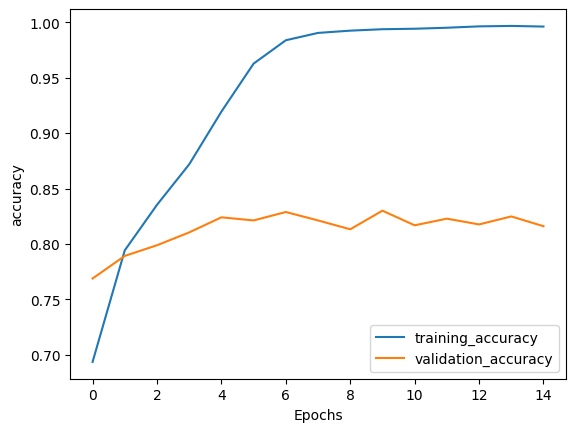

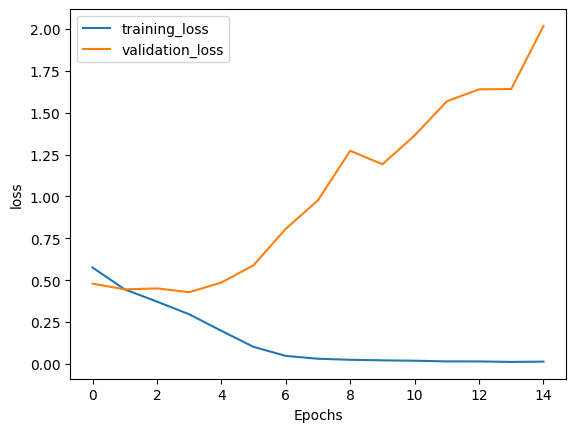

In [10]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([f'training_{metric}', f'validation_{metric}'])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

# Implement data augmentation with to resolve overfitting issues

In [11]:
def train_val_aug_generators(TRAINING_DIR, VALIDATION_DIR):
  """
  Creates the training and validation data generators
  
  Args:
    TRAINING_DIR (string): directory path containing the training images
    VALIDATION_DIR (string): directory path containing the testing/validation images
    
  Returns:
    train_generator, validation_generator - tuple containing the generators
  """
  # Instantiate the training ImageDataGenerator classw/ Data Augmentation
  train_datagen = ImageDataGenerator(rescale=1./255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  # Instantiate the validation ImageDataGenerator class
  validation_datagen = ImageDataGenerator(rescale = 1./255)

  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
 
  return train_generator, validation_generator

train_aug_generator, validation_aug_generator = train_val_aug_generators(TRAINING_DIR, VALIDATION_DIR)

Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


# Store and train the augmented model

In [12]:
# Store untrained model
model_aug = create_model()

# Train model
# This may take some time...
history_aug = model_aug.fit(train_aug_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_aug_generator)

Epoch 1/15
704/704 [==============================] - 155s 220ms/step - loss: 0.6312 - accuracy: 0.6367 - val_loss: 0.5599 - val_accuracy: 0.7108
Epoch 2/15
704/704 [==============================] - 160s 228ms/step - loss: 0.5691 - accuracy: 0.7035 - val_loss: 0.5463 - val_accuracy: 0.7296
Epoch 3/15
704/704 [==============================] - 159s 225ms/step - loss: 0.5390 - accuracy: 0.7282 - val_loss: 0.4649 - val_accuracy: 0.7768
Epoch 4/15
704/704 [==============================] - 161s 228ms/step - loss: 0.5154 - accuracy: 0.7416 - val_loss: 0.4578 - val_accuracy: 0.8012
Epoch 5/15
704/704 [==============================] - 164s 233ms/step - loss: 0.4932 - accuracy: 0.7599 - val_loss: 0.4389 - val_accuracy: 0.8056
Epoch 6/15
704/704 [==============================] - 159s 226ms/step - loss: 0.4766 - accuracy: 0.7721 - val_loss: 0.4484 - val_accuracy: 0.7996
Epoch 7/15
704/704 [==============================] - 155s 220ms/step - loss: 0.4623 - accuracy: 0.7795 - val_loss: 0.4425 -

# Plot the Accuracy/Loss for training and validation

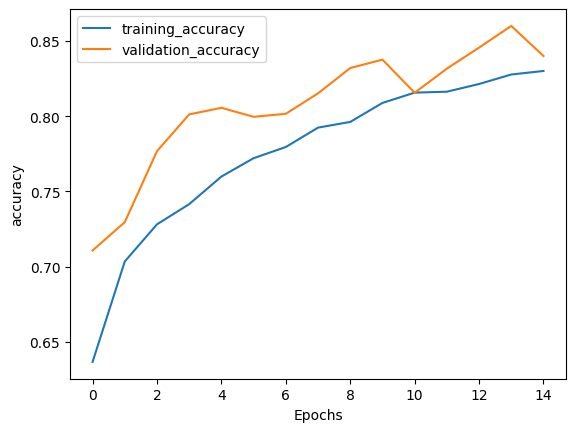

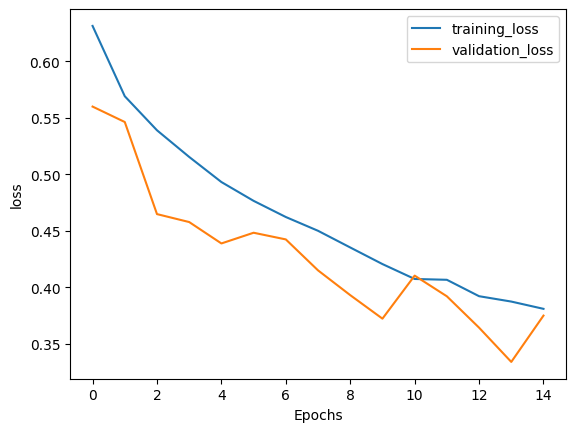

In [13]:
def plot_graphs(history_aug, metric):
    plt.plot(history_aug.history[metric])
    plt.plot(history_aug.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([f'training_{metric}', f'validation_{metric}'])
    plt.show()
    
plot_graphs(history_aug, "accuracy")
plot_graphs(history_aug, "loss")